<center><h1>DSCI 552 Machine Learning for Data Science HW6</h1></center>
<br>
<center> <font size="4">Name:Chung Ming Wu</font></center>

<center> <font size="4">USC_ID:7703568593</center>
    
<center> <font size="4">Github_Username:andywu96 </center>

## 1. Tree-Based Methods
### 1-(a)  Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read dataframe
df_train_1 = pd.read_csv('../data/aps_failure_training_set_1.csv',header = 20)
df_train_2 = pd.read_csv('../data/aps_failure_training_set_2.csv',header = 20)
df_test = pd.read_csv('../data/aps_failure_test_set.csv',header = 14)

In [3]:
df_train = pd.concat([df_train_1, df_train_2],axis = 0, ignore_index=True)

In [4]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [5]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


### 1-(b) Data Preparation This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.

### 1-(b)-(i) Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.

In [6]:
# replace na to NaN to calculate how many percent of missing values in each column
df_train =  df_train.replace('na', np.nan)
df_test = df_test.replace('na', np.nan)

**I found some of the columns have more than 80% of missing value, but I still deceide to keep all features. Because, as per intuition, if we remove the feature, the model will not be able to learn from that feature if there is a high for relation of that feature with others.**

In [7]:
# loop through the columns and check the missing values

for col in df_train.columns:
    pct_missing = df_train[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

class - 0.0%
aa_000 - 0.0%
ab_000 - 77.2%
ac_000 - 5.6%
ad_000 - 24.8%
ae_000 - 4.2%
af_000 - 4.2%
ag_000 - 1.1%
ag_001 - 1.1%
ag_002 - 1.1%
ag_003 - 1.1%
ag_004 - 1.1%
ag_005 - 1.1%
ag_006 - 1.1%
ag_007 - 1.1%
ag_008 - 1.1%
ag_009 - 1.1%
ah_000 - 1.1%
ai_000 - 1.0%
aj_000 - 1.0%
ak_000 - 7.3%
al_000 - 1.1%
am_0 - 1.0%
an_000 - 1.1%
ao_000 - 1.0%
ap_000 - 1.1%
aq_000 - 1.0%
ar_000 - 4.5%
as_000 - 1.0%
at_000 - 1.0%
au_000 - 1.0%
av_000 - 4.2%
ax_000 - 4.2%
ay_000 - 1.1%
ay_001 - 1.1%
ay_002 - 1.1%
ay_003 - 1.1%
ay_004 - 1.1%
ay_005 - 1.1%
ay_006 - 1.1%
ay_007 - 1.1%
ay_008 - 1.1%
ay_009 - 1.1%
az_000 - 1.1%
az_001 - 1.1%
az_002 - 1.1%
az_003 - 1.1%
az_004 - 1.1%
az_005 - 1.1%
az_006 - 1.1%
az_007 - 1.1%
az_008 - 1.1%
az_009 - 1.1%
ba_000 - 1.1%
ba_001 - 1.1%
ba_002 - 1.1%
ba_003 - 1.1%
ba_004 - 1.1%
ba_005 - 1.1%
ba_006 - 1.1%
ba_007 - 1.1%
ba_008 - 1.1%
ba_009 - 1.1%
bb_000 - 1.1%
bc_000 - 4.5%
bd_000 - 4.5%
be_000 - 4.2%
bf_000 - 4.2%
bg_000 - 1.1%
bh_000 - 1.1%
bi_000 - 1.0%
bj_000 

In [8]:
for col in df_test.columns:
    pct_missing = df_test[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

class - 0.0%
aa_000 - 0.0%
ab_000 - 77.3%
ac_000 - 5.8%
ad_000 - 24.9%
ae_000 - 4.3%
af_000 - 4.3%
ag_000 - 1.2%
ag_001 - 1.2%
ag_002 - 1.2%
ag_003 - 1.2%
ag_004 - 1.2%
ag_005 - 1.2%
ag_006 - 1.2%
ag_007 - 1.2%
ag_008 - 1.2%
ag_009 - 1.2%
ah_000 - 1.1%
ai_000 - 1.0%
aj_000 - 1.0%
ak_000 - 7.5%
al_000 - 1.1%
am_0 - 1.0%
an_000 - 1.1%
ao_000 - 1.0%
ap_000 - 1.1%
aq_000 - 1.0%
ar_000 - 4.8%
as_000 - 1.0%
at_000 - 1.0%
au_000 - 1.0%
av_000 - 4.3%
ax_000 - 4.3%
ay_000 - 1.2%
ay_001 - 1.2%
ay_002 - 1.2%
ay_003 - 1.2%
ay_004 - 1.2%
ay_005 - 1.2%
ay_006 - 1.2%
ay_007 - 1.2%
ay_008 - 1.2%
ay_009 - 1.2%
az_000 - 1.2%
az_001 - 1.2%
az_002 - 1.2%
az_003 - 1.2%
az_004 - 1.2%
az_005 - 1.2%
az_006 - 1.2%
az_007 - 1.2%
az_008 - 1.2%
az_009 - 1.2%
ba_000 - 1.2%
ba_001 - 1.2%
ba_002 - 1.2%
ba_003 - 1.2%
ba_004 - 1.2%
ba_005 - 1.2%
ba_006 - 1.2%
ba_007 - 1.2%
ba_008 - 1.2%
ba_009 - 1.2%
bb_000 - 1.1%
bc_000 - 4.8%
bd_000 - 4.8%
be_000 - 4.3%
bf_000 - 4.3%
bg_000 - 1.1%
bh_000 - 1.1%
bi_000 - 1.0%
bj_000 

**We found lots of columns need to be numeric but are object.**

In [9]:
# check the data type
df_train.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [10]:
df_test.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [11]:
# convert all attributes into numeric and still let class as object
df_train.iloc[:,1:] = df_train.iloc[:,1:].apply(pd.to_numeric)
df_train.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

In [12]:
df_test.iloc[:,1:] = df_test.iloc[:,1:].apply(pd.to_numeric)
df_test.dtypes

class      object
aa_000      int64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object

**Use a data imputation technique to deal with the missing values in the data set.**


In [13]:
# Randomly pick one feature, and I found that it exist some outliers
# Thus, using median might be a better way compared with using mean to imputate missing value
df_train['cf_000'].describe()

count    4.513900e+04
mean     1.902218e+05
std      4.040441e+07
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      8.584298e+09
Name: cf_000, dtype: float64

**Using train_set's median to fill up with missing value for train_set and test_set**

In [14]:
# using train_set' median to fill up with missing value for test_set
#df_train = df_train.fillna(df_train.mean())
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_train.median())

In [15]:
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,0.0,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,0.0,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,0.0,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [16]:
df_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [17]:
df1 = pd.concat([df_train, df_test],axis = 0, ignore_index=True)
df1

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,neg,79636,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,neg,110,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


### 1-(b)-(ii) For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.

In [18]:
df2 = df1.copy()
df2 = df2.drop(['class'], axis=1)

npa = df2.values
cv =  lambda x: np.std(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=npa)
var

array([  4.32857936,   9.74045733,   2.30928402, 274.7897729 ,
        23.27120377,  19.00782844,  92.50690167,  42.56586495,
        17.82784613,   8.85407178,   5.53824147,   2.99412016,
         2.36485526,   2.83810501,   6.34393272,  32.53518087,
         2.32737346,  18.70135278,  43.59865915,  84.87458786,
         9.21079949,   9.16319459,   2.26562595,   2.28693197,
         3.10812825,   2.87115257,  11.07955083, 115.08131992,
        23.43130866,  86.99167589,   5.95789681,   4.00104897,
        41.37217887,  49.8140765 ,  38.78259995,  28.65543741,
        33.41957252,  12.14738571,   3.05249923,   3.27981734,
         3.9862264 ,  78.35035303,   9.09600146,   7.44806482,
        12.17146238,   7.64952954,   2.87036943,   3.09425013,
         8.80468532,  15.55909814,  22.67243313,  78.89498855,
         2.70541793,   2.66381607,   2.90622174,   2.74696793,
         2.65766895,   2.72166272,   3.02119049,   2.85633235,
         6.78447727,   9.63825681,   2.42314063,   7.01

In [19]:
cols=df2.columns.values
colvars=pd.DataFrame(np.column_stack([cols, var]))
colvars = colvars.rename(columns={0: 'Columns_name', 1: 'Coefficient of Variation CV'})
colvars

,Columns_name,Coefficient of Variation CV
0,aa_000,4.32858
1,ab_000,9.74046
2,ac_000,2.30928
3,ad_000,274.79
4,ae_000,23.2712
...,...,...
165,ee_007,4.93537
166,ee_008,3.37387
167,ee_009,5.82097
168,ef_000,50.2234


### 1-(b)-(iii) Plot a correlation matrix for the features in the data set

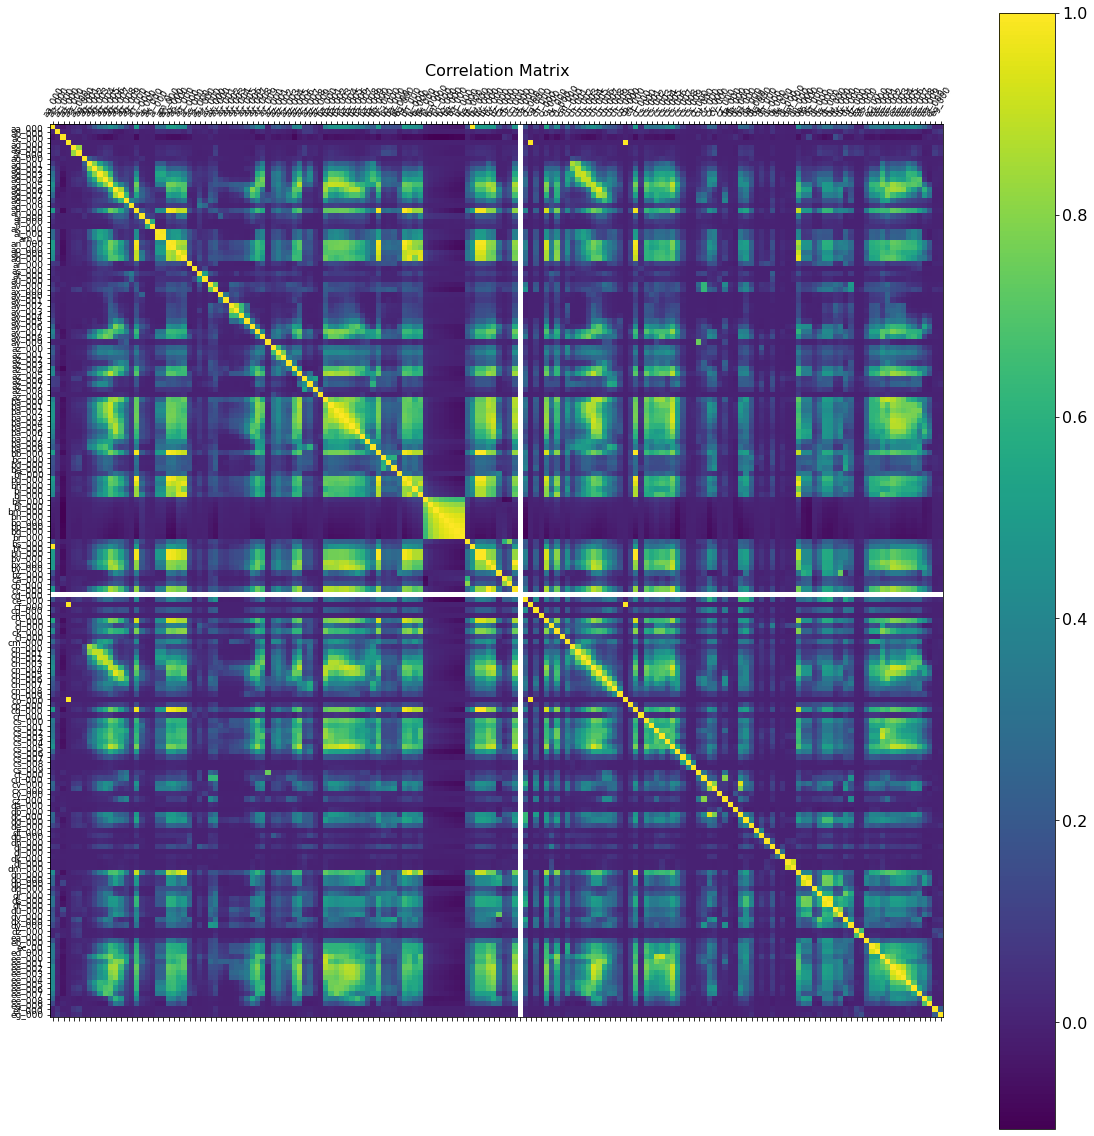

In [20]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(20, 20))
plt.matshow(df2.corr(),fignum=f.number)
plt.xticks(range(df2.select_dtypes(['number']).shape[1]), df2.columns, fontsize=9, rotation=60)
plt.yticks(range(df2.select_dtypes(['number']).shape[1]), df2.columns, fontsize=9)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16);

### 1-(b)-(iv) Pick [$\sqrt[2]{170}$] features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [21]:
import math 

# get the features
sorte = colvars.sort_values('Coefficient of Variation CV', ascending=False)
highestvar= sorte.head(int(math.floor(math.sqrt(170))))

# Result of 13 highest CV features 
highestvar

,Columns_name,Coefficient of Variation CV
91,cf_000,275.594
109,co_000,275.066
3,ad_000,274.79
122,cs_009,194.72
138,dj_000,130.914
136,dh_000,120.759
134,df_000,119.384
27,as_000,115.081
6,ag_000,92.5069
29,au_000,86.9917


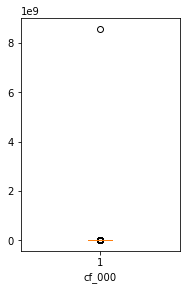

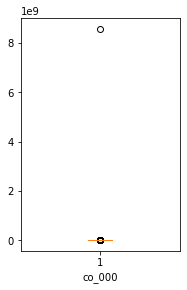

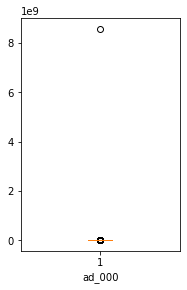

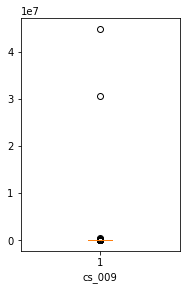

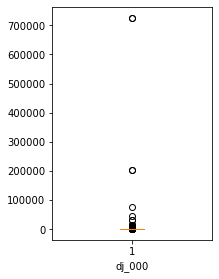

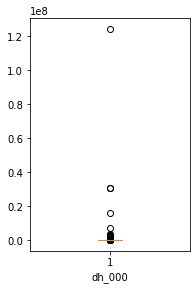

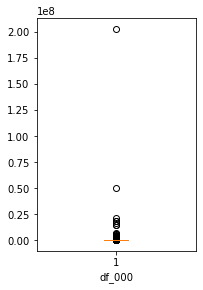

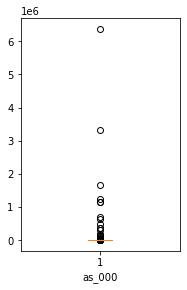

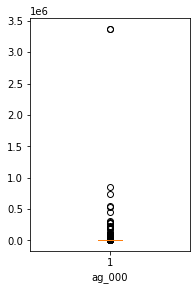

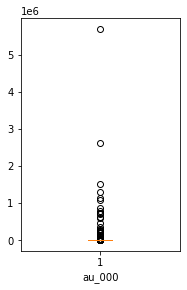

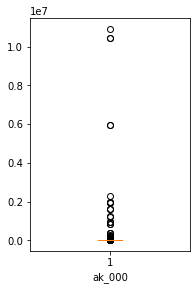

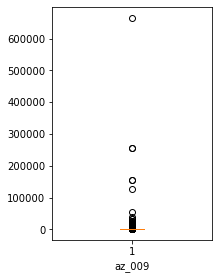

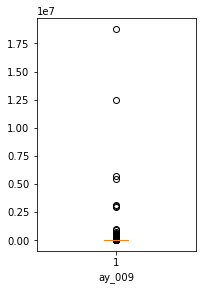

In [22]:
# draw box plot 
import seaborn as sns

selected_cols = df2[highestvar['Columns_name']]
box = selected_cols.columns
i=1
for k in box:
    plt.subplots(figsize=(20, 30))
    plt.subplot(6,6,i)
    plt.xlabel(k)
    plt.boxplot(selected_cols[k])
    i=i+1

<ipython-input-23-208567c7d7e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cols['class'] = df1['class']


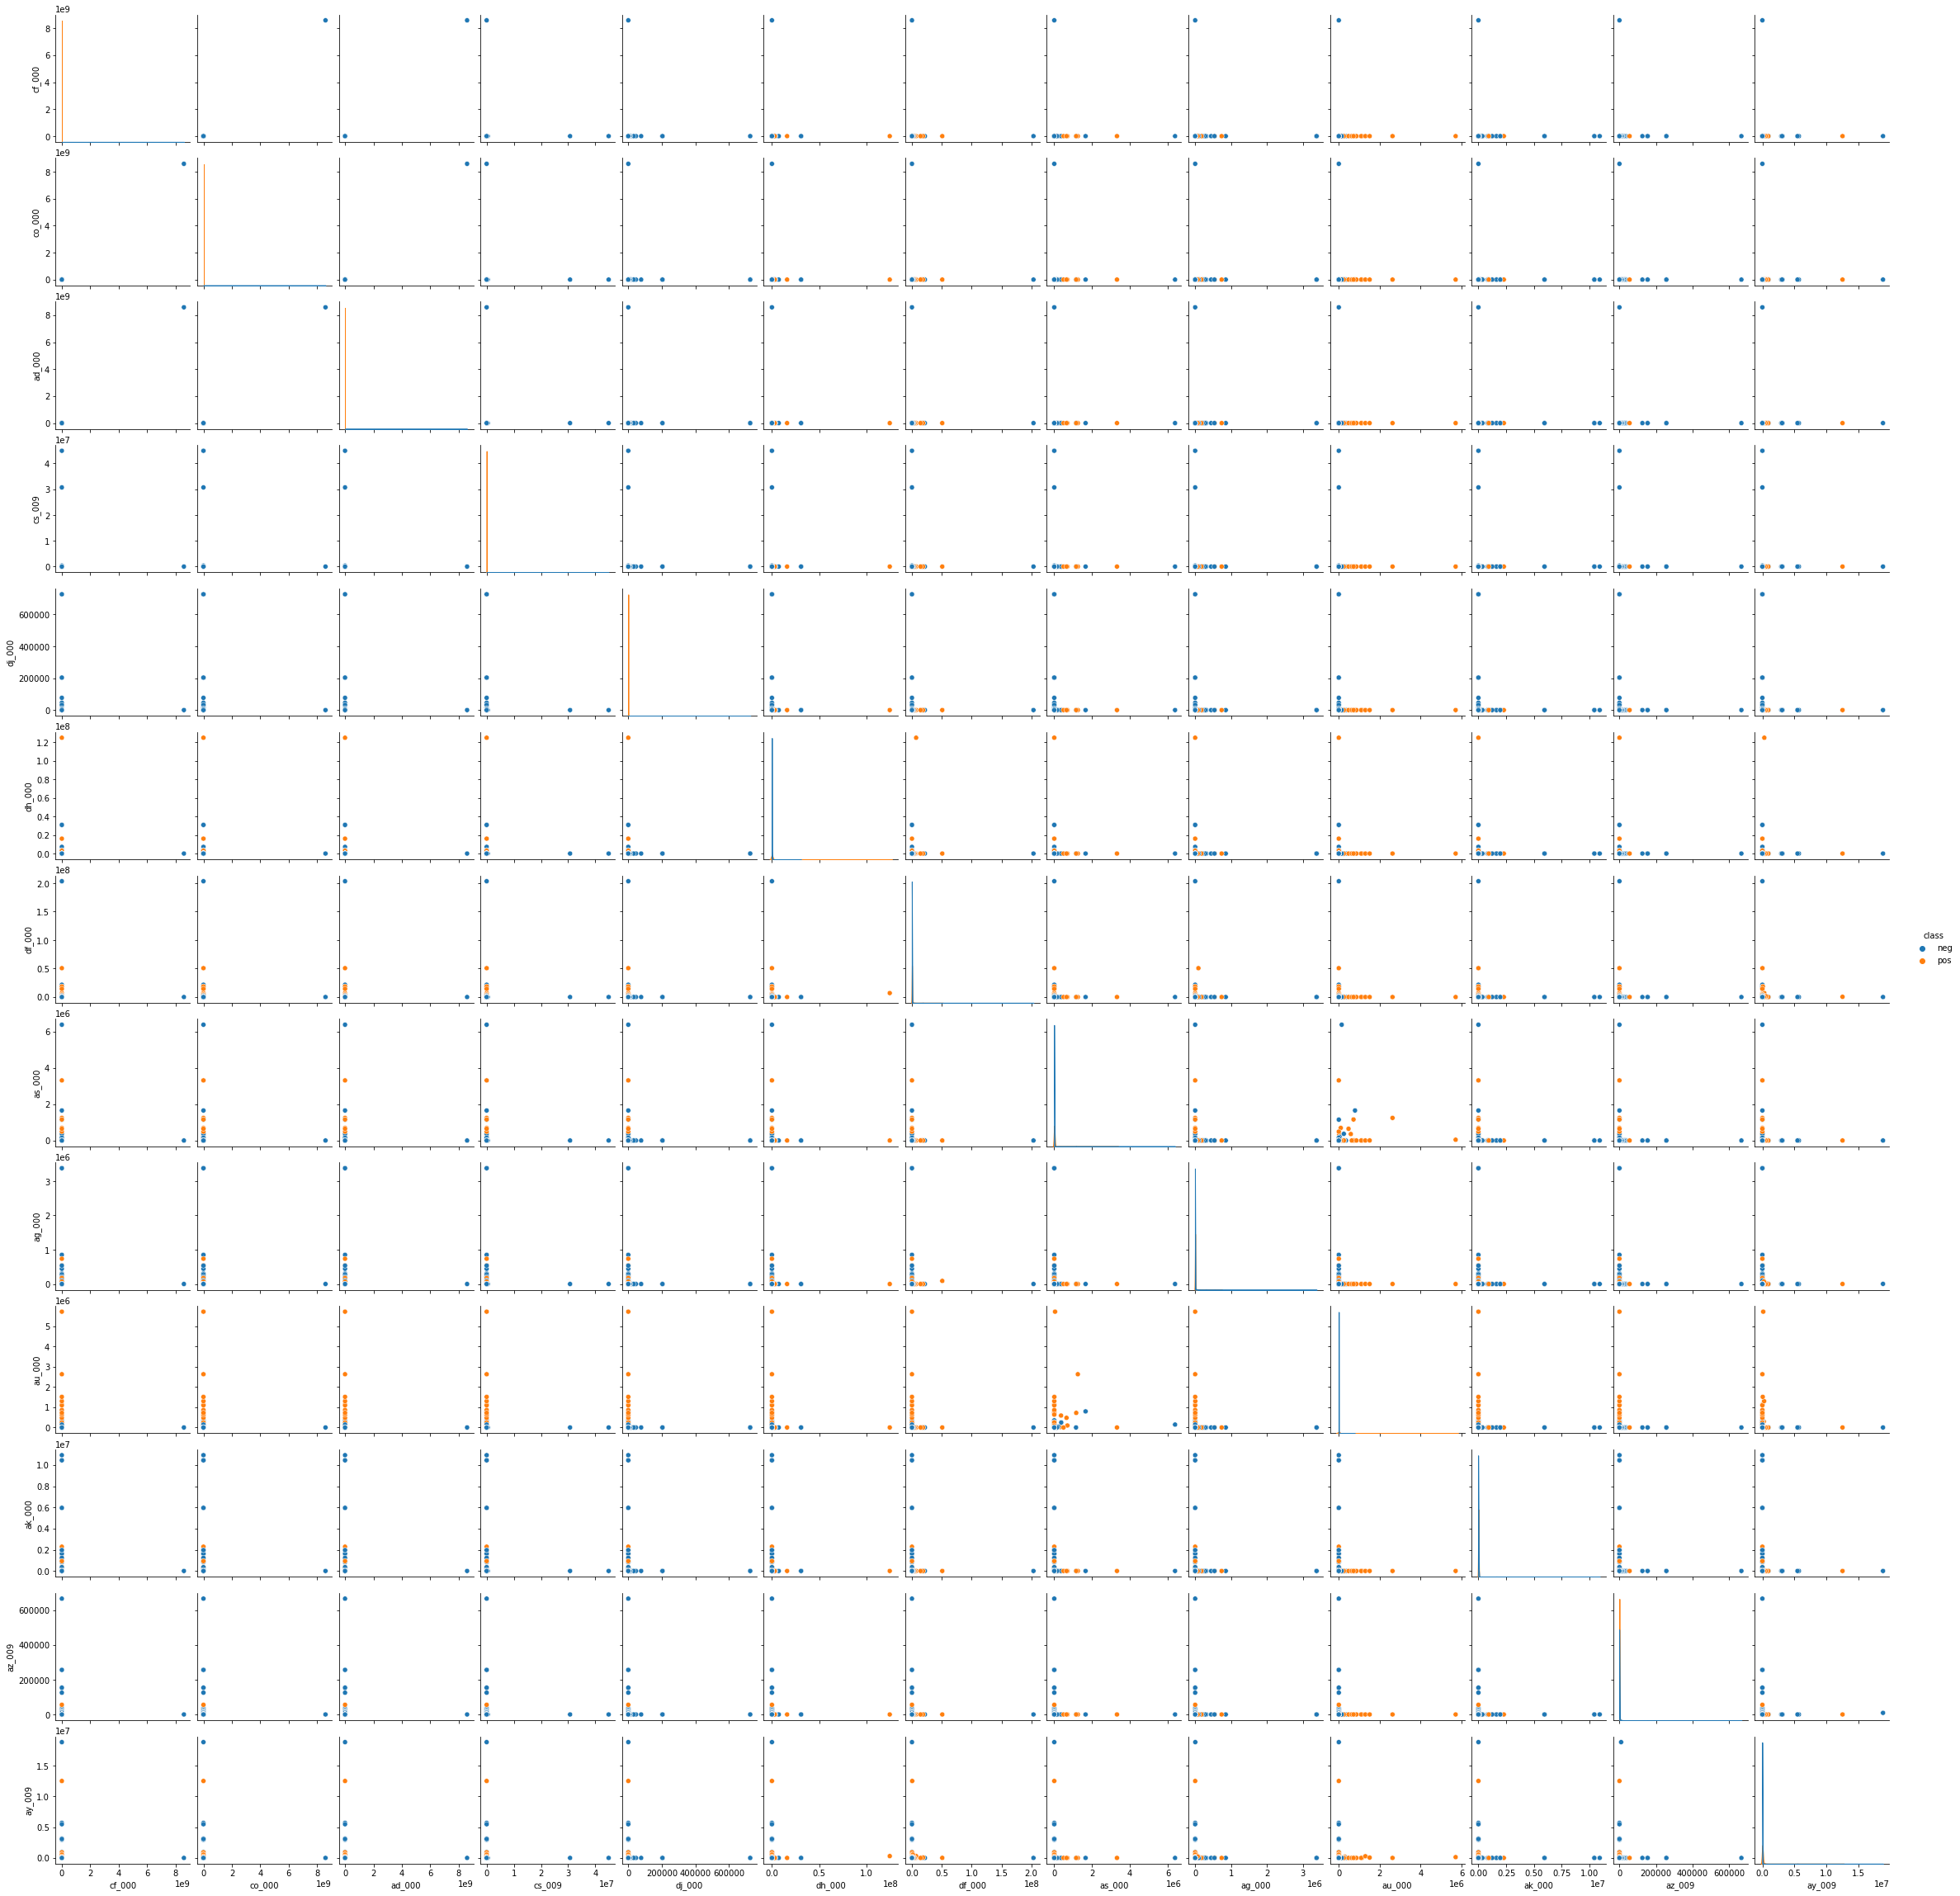

In [23]:
# draw 13 pairwise scatter plot

selected_cols['class'] = df1['class']
sns.pairplot(selected_cols, hue = 'class')

**No, we can just find the relatinoship between two features on scatter plots, and if we want to define the significance of those features, need to fit a model and using p-value to decide.**

### 1-(b)-(v) Determine the number of positive and negative data. Is this data set imbalanced?

In [24]:
df1['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

In [25]:
1375/74625

0.018425460636515914

**Yes, there exists some imbalanced in the data set, because in the train set only 1375 out of 74625 are "positive", which only represent around 1.8% of the train set. The class distribution is not uniform among the classes.**


### 1-(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

**Train Set**

In [27]:
# label-encoding 'class' and Separate to X and y
df_train_X = df_train.iloc[:,1:]
LE=LabelEncoder().fit(df_train['class'])
df_train_y = LE.transform(df_train['class'])


# fit a RandomForest model
bag_model = RandomForestClassifier(random_state=0, oob_score = True)
bag_model.fit(df_train_X,df_train_y)
pred_train = bag_model.predict(df_train_X)
pred_prob_train = bag_model.predict_proba(df_train_X)[::,1]

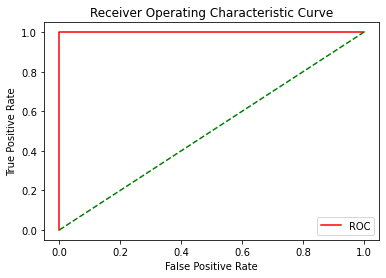

AUC_score of Train set for Random Forest :  1.0


In [28]:
# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_train_y, pred_prob_train)


#plt_roc_curve(fper, tper)
def plot_roc_curve(f_pos, t_pos):
    plt.plot(f_pos, t_pos, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(f_pos, t_pos)  
print('AUC_score of Train set for Random Forest : ', roc_auc_score(df_train_y, pred_prob_train))

In [29]:
# Confusion Matrix
# label 0 = Negative 
# label 1 = Positive
# Cost_1 = 10  = Predicted 0, but Actual 1
# Cost_2 = 500 = Predicted 1, but Actual 0
pd.crosstab(pred_train, df_train_y)

col_0,0,1
row_0,,
0,59000,0
1,0,1000


In [30]:
# Cost-metric of miss-classification in train set :
0*500+0*10

0

**Test Set**

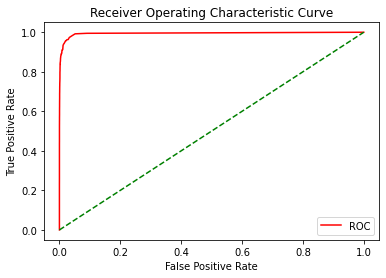

AUC_score of Train set for Random Forest :  0.9943537493333334


In [31]:
# label-encoding 'class' and Separate to X and y
df_test_X = df_test.iloc[:,1:]
LE=LabelEncoder().fit(df_test['class'])
df_test_y =  LE.transform(df_test['class'])

# predict test set
pred_test = bag_model.predict(df_test_X)
pred_prob_test = bag_model.predict_proba(df_test_X)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_test_y,pred_prob_test)
    
plot_roc_curve(f_pos, t_pos)  
print('AUC_score of Train set for Random Forest : ', roc_auc_score(df_test_y,pred_prob_test))

In [32]:
# Confusion Matrix
# label 0 = Negative 
# label 1 = Positive
# Cost_1 = 10  = Predicted 0, but Actual 1
# Cost_2 = 500 = Predicted 1, but Actual 0
pd.crosstab(pred_test,df_test_y)

col_0,0,1
row_0,,
0,15610,103
1,15,272


In [33]:
# Test Error Rate:
(15+103)/(15610+103+272+15)

0.007375

In [34]:
# Cost-metric of miss-classification in test set:
103*500+15*10

51650

In [35]:
#Out of Bag Error Estimate 
1 - bag_model.oob_score_

0.006166666666666654

**The Train Error is 0, and the cost-metric of miss-classification in train set is 0 ; Test Error is 0.7%, and the cost-metric of miss-classification in test set is 51650, the Out of Bag error estimate is 0.6%.**

### 1-(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c.

**We can use Random Forest With class_weight equal to "balanced_subsample" to address class imbalance.**

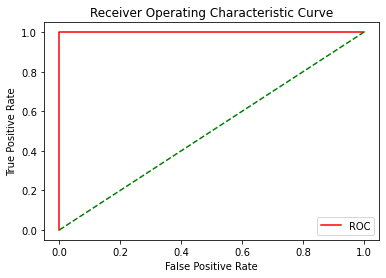

AUC_score of Train set for Random Forest :  1.0


In [36]:
# fit a RandomForest model with class balance
bag_model_balance = RandomForestClassifier(random_state=0, oob_score = True, class_weight = "balanced_subsample" )
bag_model_balance.fit(df_train_X,df_train_y)
pred_balance_train = bag_model_balance.predict(df_train_X)
pred_proba_balance_train = bag_model_balance.predict_proba(df_train_X)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_train_y,pred_proba_balance_train)
    
plot_roc_curve(f_pos, t_pos)  
print('AUC_score of Train set for Random Forest : ', roc_auc_score(df_train_y,pred_proba_balance_train))

In [37]:
# Confusion Matrix of Train
# label 0 = Negative 
# label 1 = Positive
# Cost_1 = 10  = Predicted 0, but Actual 1
# Cost_2 = 500 = Predicted 1, but Actual 0
pd.crosstab(pred_balance_train, df_train_y)

col_0,0,1
row_0,,
0,59000,0
1,0,1000


In [38]:
# Cost-metric of miss-classification in train set with undersampling :
0*500+0*10

0

**Test Set with class_weight equal to "balanced_subsample"**

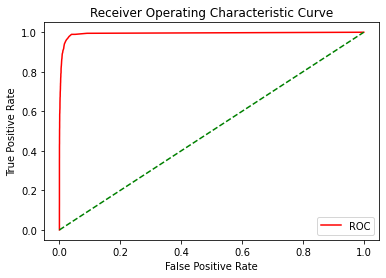

AUC_score of Train set for Random Forest :  0.993427968


In [39]:
# fit a RandomForest model with undersampleing
pred_balance_test = bag_model_balance.predict(df_test_X)
pred_proba_balance_test = bag_model_balance.predict_proba(df_test_X)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_test_y,pred_proba_balance_test)

plot_roc_curve(f_pos, t_pos)  
print('AUC_score of Train set for Random Forest : ', roc_auc_score(df_test_y,pred_proba_balance_test))

In [40]:
# Confusion Matrix of Test
# label 0 = Negative 
# label 1 = Positive
# Cost_1 = 10  = Predicted 0, but Actual 1
# Cost_2 = 500 = Predicted 1, but Actual 0
pd.crosstab(pred_balance_test, df_test_y)

col_0,0,1
row_0,,
0,15611,159
1,14,216


In [41]:
# Test Error Rate:
(159+14)/(15611+159+14+216)

0.0108125

In [42]:
# Cost-metric of miss-classification in test set:
159*500+14*10

79640

In [43]:
#Out of Bag Error Estimate 
1 - bag_model_balance.oob_score_

0.007683333333333375

**The Train Error is 0, and the cost-metric of miss-classification in train set is 0 ; Test Error is 1%, and the cost-metric of miss-classification in test set is 79640, the Out of Bag error estimate is 0.768%.**

**After using class weight to deal with the imbalanced data, both test error and Out of Bag error estimate are slightly increase, compared with previous 1-c imalanced data. However, based on Cost-metric of miss-classification, the type-2 error increase significantly so that the total cost up to 79640.**

### 1-(e)  XGBoost and Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision
rule, one has Xj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node. One of the methods that can be used at each node is Logistic Regression. Because the number of variables is large in this problem, one can use L1-penalized logistic regression at each node. You can use XGBoost to fit the model tree. Determine alpha (the regularization term) using cross-validation. Train the model for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

**Using 5 StratifiedKFold to find the best alpha with GridSearchCV**

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# using GridSearchCV with StratifiedKFold to get the best alpha
xgb = XGBClassifier( objective='binary:logistic' , random_state=0,  reg_lambda  = 0,
                            eval_metric='logloss' , use_label_encoder=False )
alphas = list(np.linspace(0, 1, 5))
test_parms = { 'reg_alpha' : alphas }
kf = StratifiedKFold(n_splits= 5,shuffle = True, random_state=0)
xgb_cv = GridSearchCV(estimator = xgb, param_grid = test_parms, cv = kf) 
xgb_cv.fit(df_train_X,df_train_y)

# get the best alpha
print("The best L1 regularization alpha:", xgb_cv.best_params_)

The best L1 regularization alpha: {'reg_alpha': 0.75}


In [45]:
# get the best CV score 
print("The Best L1 regularization CV Score :", xgb_cv.best_score_)

The Best L1 regularization CV Score : 0.9948333333333335


**Train Set with best alpha 0.5 in XGBoost**

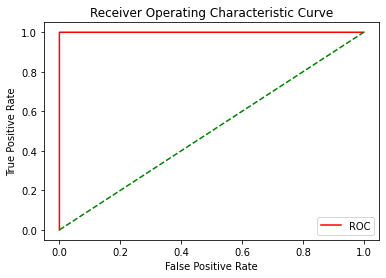

AUC_score of Train set for XGBoost :  1.0


In [46]:
# fit the best L1_Alpha with train set
xgb_1 = XGBClassifier(objective='binary:logistic' , reg_alpha = 0.5, random_state=0,  reg_lambda  = 0,
                        eval_metric='logloss' , use_label_encoder=False )
xgb_1.fit(df_train_X,df_train_y)
pred_xgb_train = xgb_1.predict(df_train_X)
pred_proba_xgb_train = xgb_1.predict_proba(df_train_X)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_train_y, pred_proba_xgb_train)
    
plot_roc_curve(f_pos, t_pos) 
print('AUC_score of Train set for XGBoost : ', roc_auc_score(df_train_y, pred_proba_xgb_train))

In [47]:
# Confusion Matrix of Train set 
# label 0 = Negative 
# label 1 = Positive
pd.crosstab(pred_xgb_train, df_train_y)

col_0,0,1
row_0,,
0,59000,1
1,0,999


In [48]:
# Train Error Rate:
(1)/(59000+999+1)

1.6666666666666667e-05

**Test Set with best alpha in XGBoost**

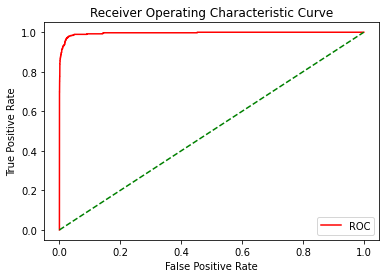

AUC_score of Test set for XGBoost :  0.9956860586666666


In [49]:
# predict with test set 
pred_xgb_test = xgb_1.predict(df_test_X)
pred_proba_xgb_test = xgb_1.predict_proba(df_test_X)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_test_y, pred_proba_xgb_test)
    
plot_roc_curve(f_pos, t_pos) 
print('AUC_score of Test set for XGBoost : ', roc_auc_score(df_test_y, pred_proba_xgb_test))

In [50]:
# Confusion Matrix of Test set 
# label 0 = Negative 
# label 1 = Positive
# Cost_1 = 10  = Predicted 0, but Actual 1
# Cost_2 = 500 = Predicted 1, but Actual 0
pd.crosstab(pred_xgb_test, df_test_y)

col_0,0,1
row_0,,
0,15613,89
1,12,286


In [51]:
# Cost-metric of miss-classification in test set:
89*500+12*10

44620

In [52]:
# Test Error Rate:
(12+89)/(15613+89+12+286)

0.0063125

**Based on Train set CV result, the error rate is less than 1%; The Test Error is 0.6%, which also less than 1%.**

### 1-(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train XGBoost with L1-penalized logistic regression at each node using the pre-processed data and repeat 1e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE case.

**Using 5 StratifiedKFold to find the best alpha with GridSearchCV for class imbalance in XGBoost SMOTE**

In [53]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE

In [54]:
# summarize class distribution
print("Before oversampling: ",Counter(df_train_y))

# define oversampling strategy
SMOTE = SMOTE(random_state = 0)

# fit and apply the transform
X_SMOTE, y_SMOTE = SMOTE.fit_resample(df_train_X, df_train_y)

# summarize class distribution
print("After oversampling: ",Counter(y_SMOTE))

Before oversampling:  Counter({0: 59000, 1: 1000})
After oversampling:  Counter({0: 59000, 1: 59000})


In [55]:
# using GridSearchCV with StratifiedKFold to get the best alpha
xgb = XGBClassifier( objective='binary:logistic' , random_state=0,  reg_lambda  = 0,
                            eval_metric='logloss' , use_label_encoder=False )
alphas = list(np.linspace(0, 1, 5))
test_parms = { 'reg_alpha' : alphas }
kf = StratifiedKFold(n_splits= 5,shuffle = True,random_state = 0)
xgb_cv_SMOTE = GridSearchCV(estimator = xgb, param_grid = test_parms, cv = kf) 
xgb_cv_SMOTE.fit(X_SMOTE, y_SMOTE)

# get the best alpha
print("The best L1 regularization alpha:", xgb_cv_SMOTE.best_params_)

The best L1 regularization alpha: {'reg_alpha': 0.5}


In [56]:
# get the best CV score 
print("The Best L1 regularization CV Score :", xgb_cv_SMOTE.best_score_)

The Best L1 regularization CV Score : 0.9976271186440678


#### Fit the best alpha 0.5 for the Train Set with compensated for class imbalance in XGBoost SMOTE

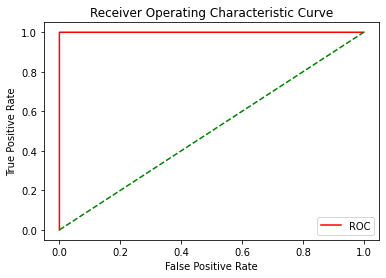

AUC_score of Train set for XGBoost SMOTE :  0.9999999333524849


In [57]:
# fit for the Train Set with compensated for class imbalance in XGBoost SMOTE
xgb_SMOTE_1 = XGBClassifier(objective='binary:logistic' , reg_alpha = 0.5, random_state=0,  reg_lambda  = 0,
                            eval_metric='logloss' , use_label_encoder=False)
xgb_SMOTE_1.fit(X_SMOTE, y_SMOTE)
pred_xgb_SMOTE_train = xgb_SMOTE_1.predict(X_SMOTE)
pred_proba_xgb_SMOTE_train = xgb_SMOTE_1.predict_proba(X_SMOTE)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(y_SMOTE,pred_proba_xgb_SMOTE_train)
    
plot_roc_curve(f_pos, t_pos) 
print('AUC_score of Train set for XGBoost SMOTE : ', roc_auc_score(y_SMOTE,pred_proba_xgb_SMOTE_train))

In [58]:
# Confusion Matrix of Train set with compensated for class imbalance in XGBoost SMOTE
# label 0 = Negative 
# label 1 = Positive
# Cost_1 = 10  = Predicted 0, but Actual 1
# Cost_2 = 500 = Predicted 1, but Actual 0
pd.crosstab(pred_xgb_SMOTE_train, y_SMOTE)

col_0,0,1
row_0,,
0,59000,1
1,0,58999


In [59]:
# Train Error Rate:
(1)/(59000*2)

8.47457627118644e-06

#### Predict the Test Set with compensated for class imbalance in XGBoost SMOTE

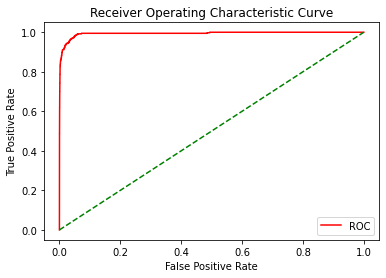

AUC_score of Test set for XGBoost SMOTE :  0.9936868693333334


In [60]:
# predict for the Test Set with compensated for class imbalance in XGBoost SMOTE
pred_xgb_SMOTE_test = xgb_SMOTE_1.predict(df_test_X)
pred_proba_xgb_SMOTE_test = xgb_SMOTE_1.predict_proba(df_test_X)[::,1]

# calculate ROC 
f_pos, t_pos, thresholds = roc_curve(df_test_y,pred_proba_xgb_SMOTE_test)
    
plot_roc_curve(f_pos, t_pos) 
print('AUC_score of Test set for XGBoost SMOTE : ', roc_auc_score(df_test_y,pred_proba_xgb_SMOTE_test))

In [61]:
# Confusion Matrix of Test set with compensated for class imbalance in XGBoost SMOTE
# label 0 = Negative 
# label 1 = Positive
pd.crosstab(pred_xgb_SMOTE_test, df_test_y)

col_0,0,1
row_0,,
0,15582,62
1,43,313


In [62]:
# Cost-metric of miss-classification in test set:
62*500+43*10

31430

In [63]:
# Test Error Rate:
(62+43)/(15582+62+313+43)

0.0065625

**Based on Train set CV result, the error rate is less than 1%; The Test Error is 0.65%, which also less than 1%.**

**There's no significant different in test error rate between uncompensated case and SMOTE case. However, when we calculate the cost-metric of miss-classification in test set, we can find that SMOTE case reduce the cost from 44620 to 31430**